In [36]:
#Importing all necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt

In [7]:
#Reading the dataset
df=pd.read_csv("Diwali Sales Data.csv",encoding= 'unicode_escape')

In [8]:
df.head() 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [15]:
df.shape # Checking for no.of rows and columns

(11251, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [12]:
df.isnull().sum() # Checking is there any null values in the dataset 

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [14]:
# Droping /Deleting unnecessary columns from the dataset 
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [16]:
df.shape

(11251, 13)

In [17]:
# Deleting or droping the null values rows 
df.dropna(inplace=True)

In [18]:
df.shape

(11239, 13)

In [19]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [21]:
#Changing the datatyp 
df['Amount']=df['Amount'].astype('int')

In [23]:
df["Amount"].dtype

dtype('int32')

In [33]:
df.columns

Index(['User_ID', 'customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [32]:
#Remanimg the column name 
df.rename(columns={'Cust_name':'customer_name'},inplace=True)

In [34]:
# use describe for specific columns 
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Explorative Data Analysis


# Gender


In [ ]:
ax =sns.countplot(x= 'Gender',data= df,palette="mako") 
for bars in ax.containers :
    ax.bar_label(bars)


In [46]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

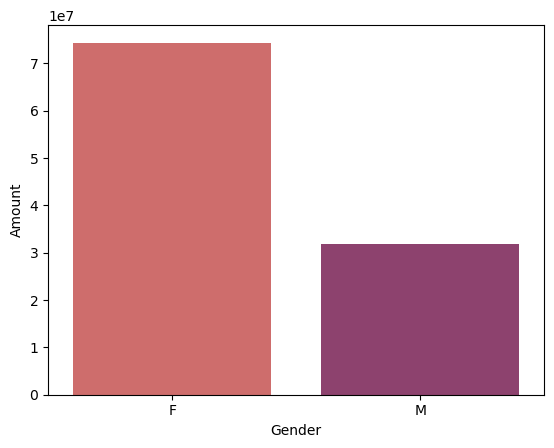

In [60]:
Amount_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data= Amount_gen,palette="mako")


# Age

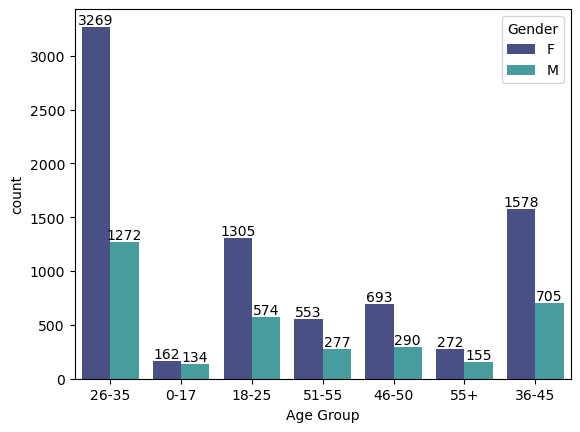

In [62]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender',palette="mako")
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

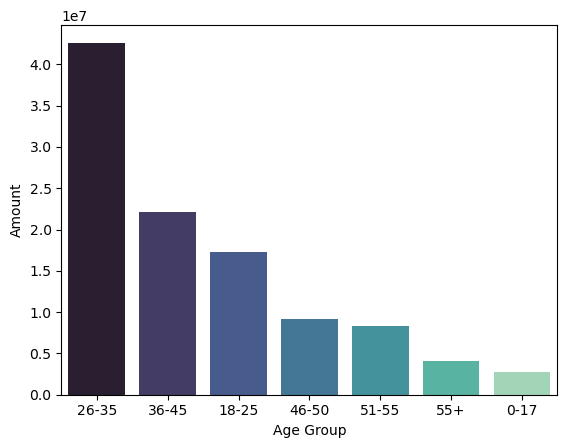

In [64]:
Amount_Age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data= Amount_Age,palette="mako")

# State

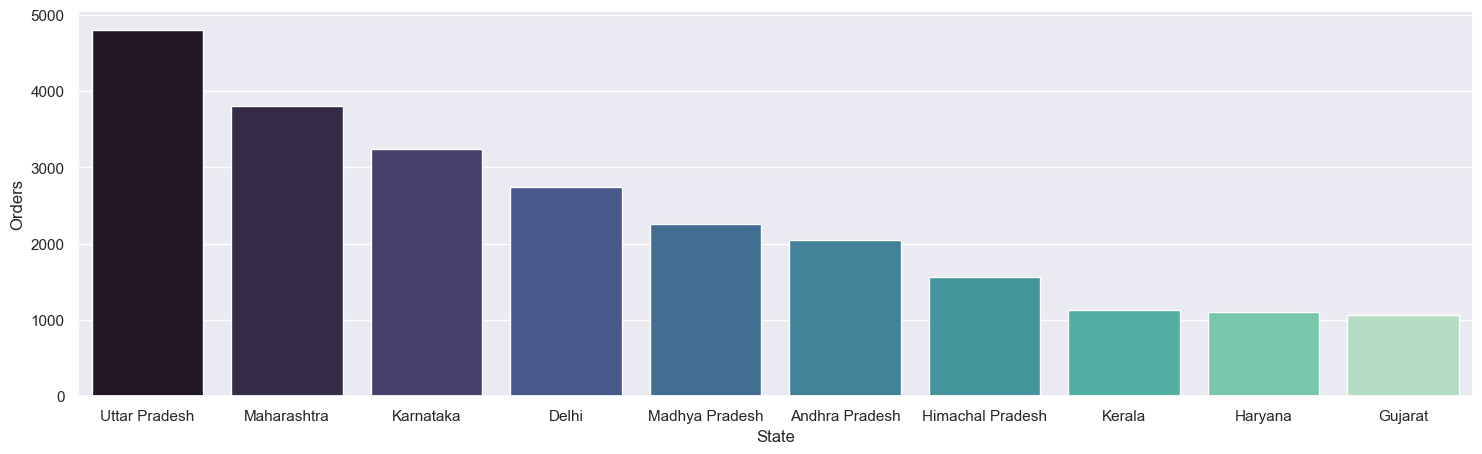

In [70]:
# Oders from top 10 States
Amount_State=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='State',y='Orders',data= Amount_State,palette="mako") 
sns.set(rc={'figure.figsize':(18,10)})

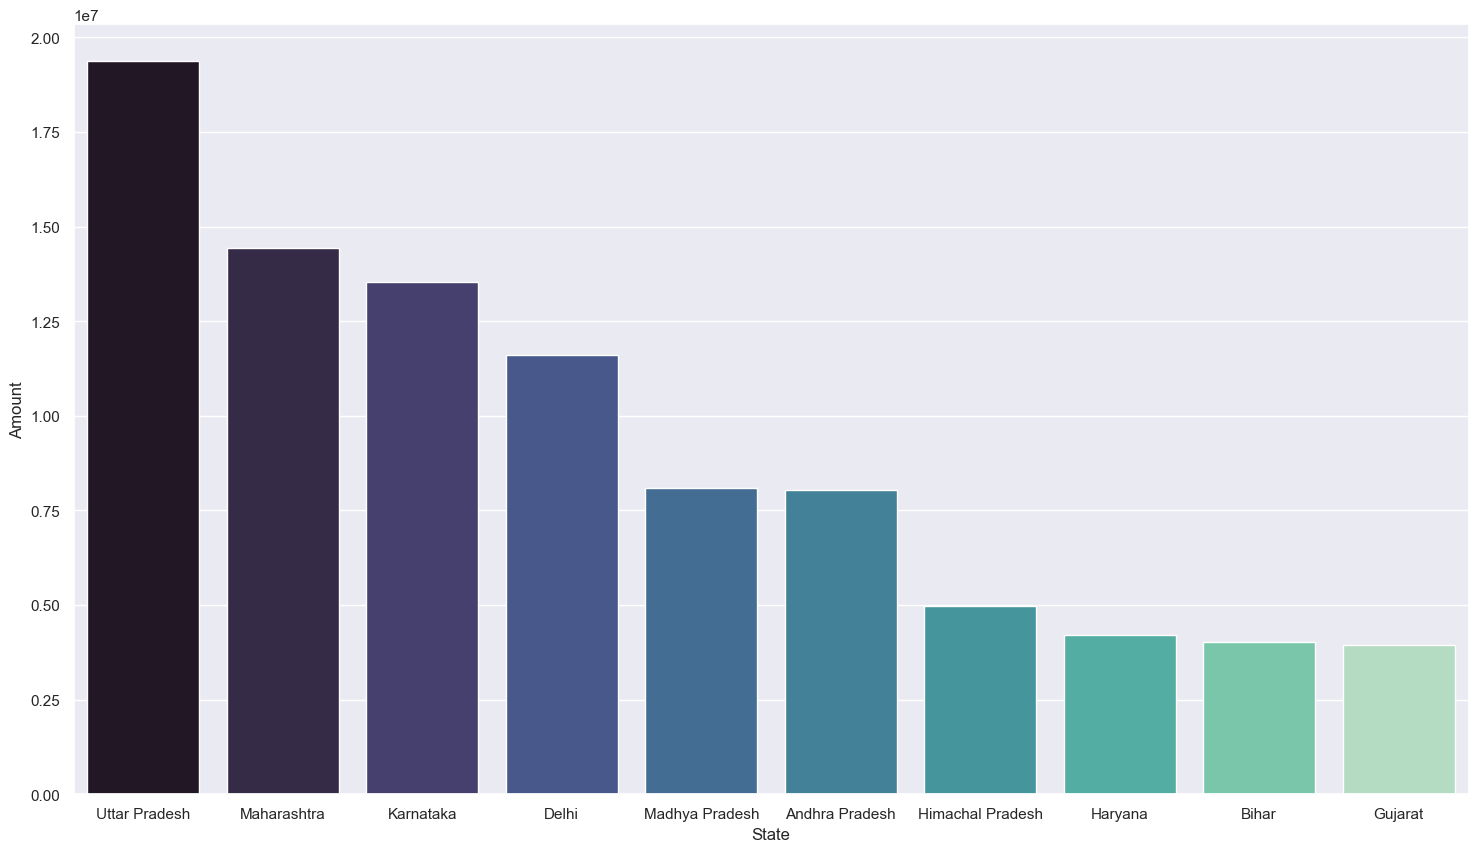

In [72]:
# Total sales amount from Top 10 Stetes
statesales=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='State',y='Amount',data= statesales,palette="mako") 
sns.set(rc={'figure.figsize':(18,10)})

In [73]:
# Here we can see most of the sales and orders  are from the state Uttar Pradesh , Maharashtra na Karnataka

# Marital Status

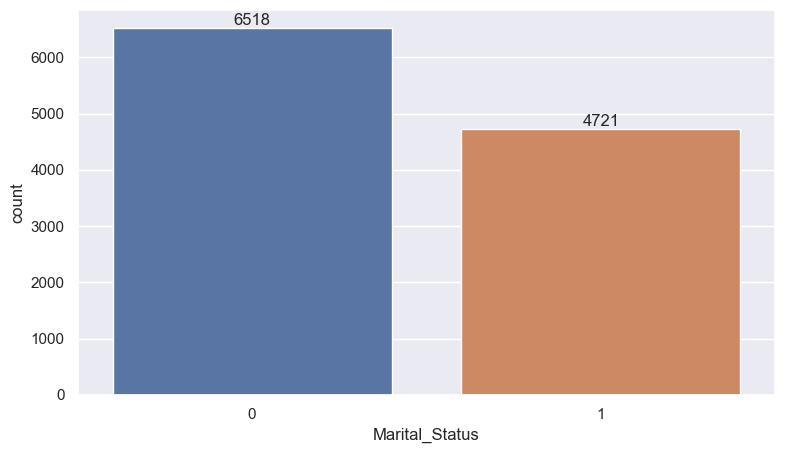

In [76]:
ax=sns.countplot(x='Marital_Status',data=df )
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(7,5)})    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

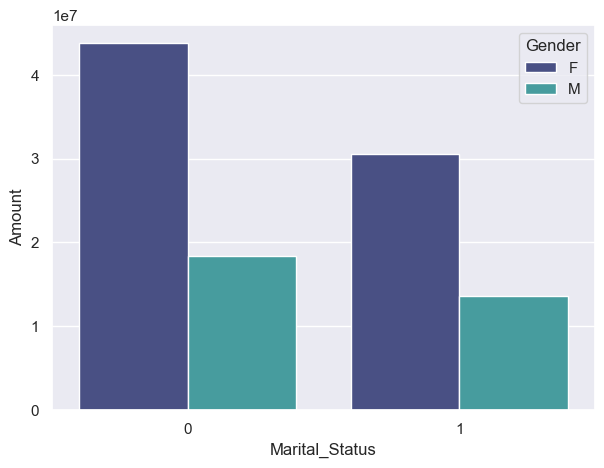

In [79]:
Marital_sales=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data= Marital_sales,hue='Gender',palette="mako") 

In [80]:
# From the above graph we can see that most of the buyers are married (female) and have high purchasing power compare to male . 

# Occupation

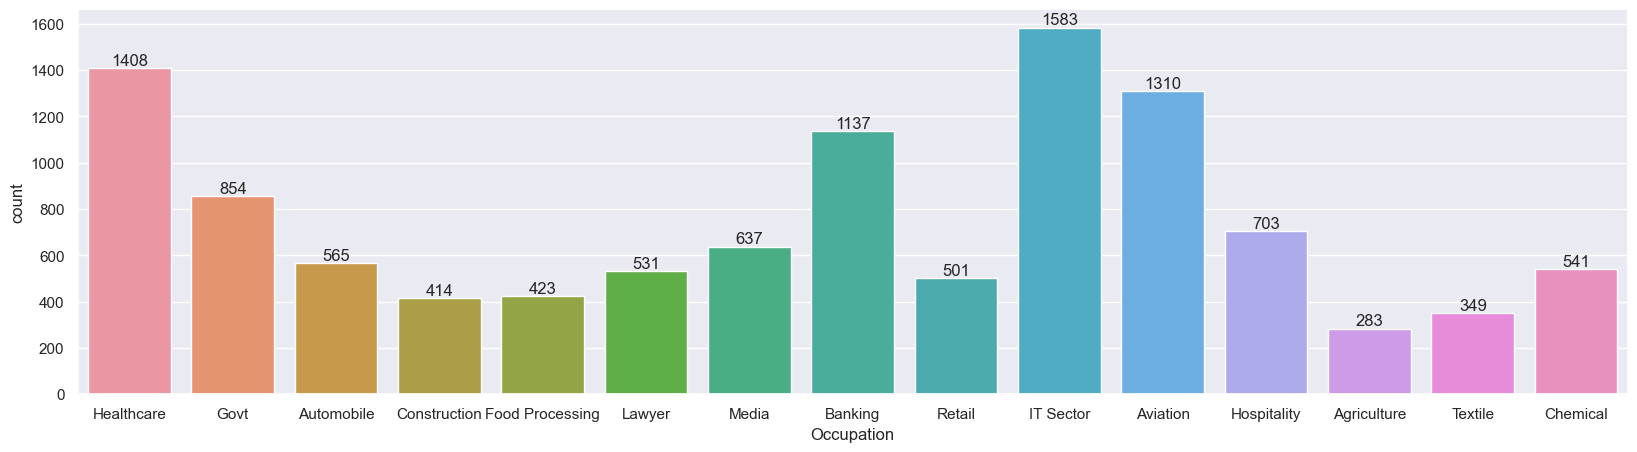

In [84]:
ax=sns.countplot(x='Occupation',data=df )
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(22,5)}) 

In [85]:
#Most of the buyers are from the IT Sector,followed by healthcare and Aviation

In [86]:
df.columns

Index(['User_ID', 'customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product Category

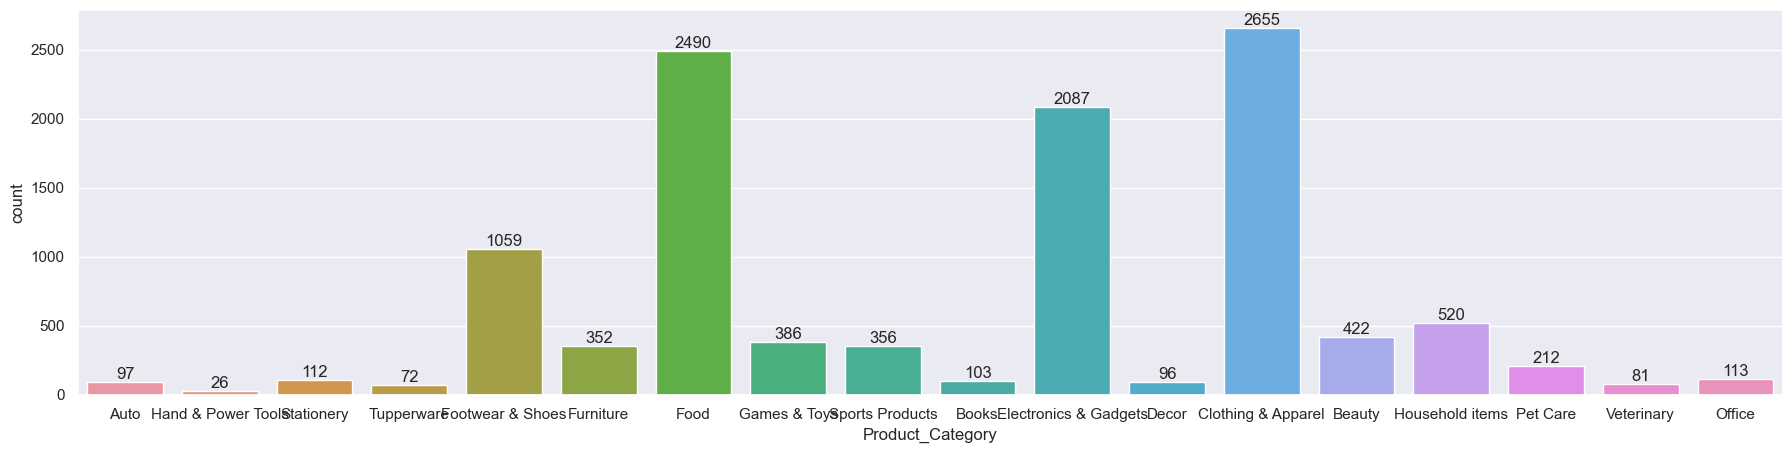

In [87]:
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(22,5)}) 

<Axes: xlabel='Product_Category', ylabel='Amount'>

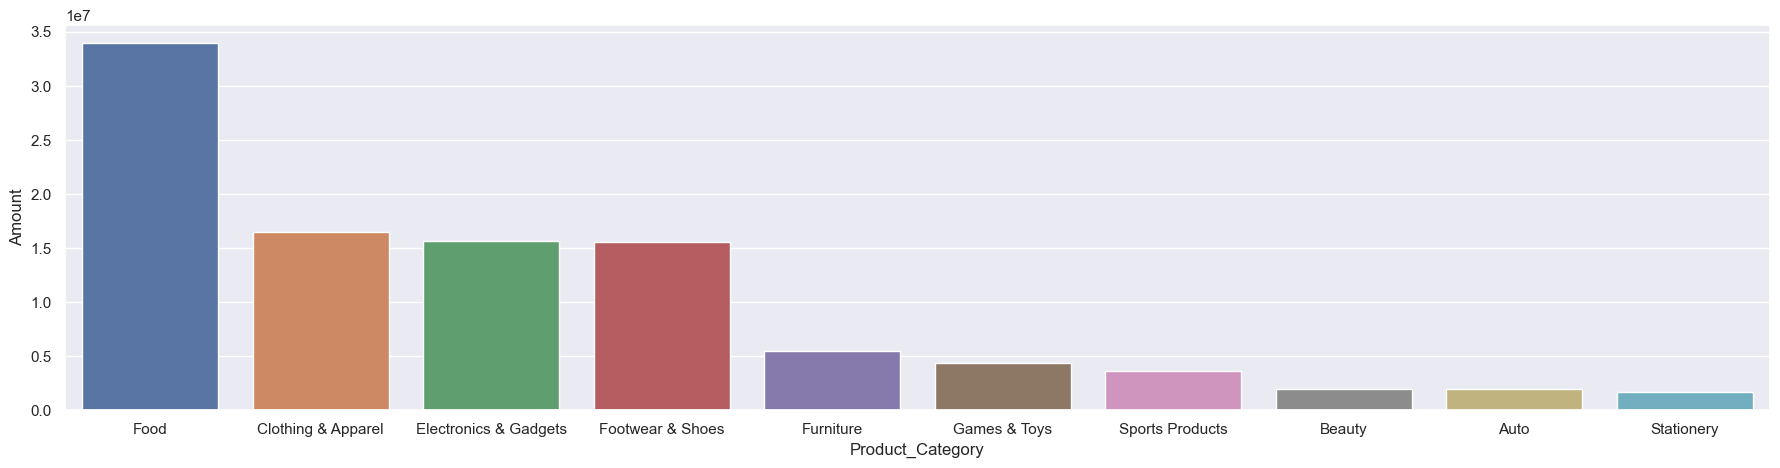

In [89]:
product_sales=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(22,5)}) 
sns.barplot(x='Product_Category',y= 'Amount',data=product_sales)

In [90]:
#From the above analysis we can see that most of the sold products and
# amount spent on the category 'food,clothing& apparel,electronic & gadgets'

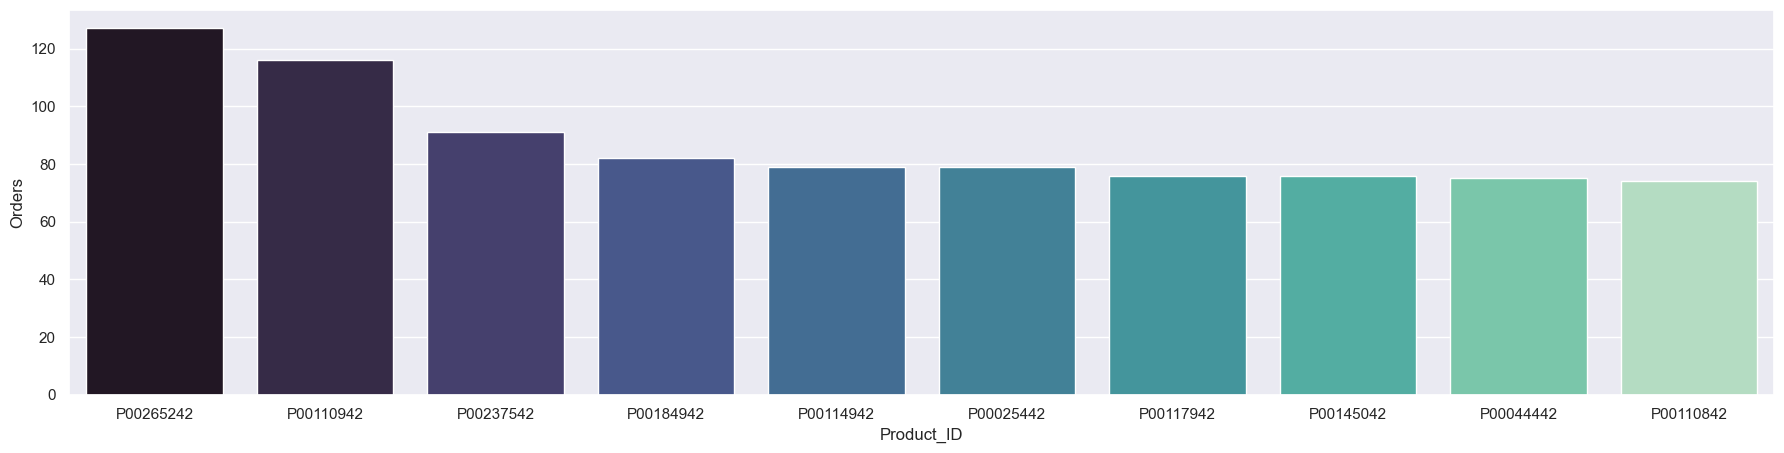

In [103]:
# Top 10 most sold products  
Productid=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='Product_ID',y='Orders',data= Productid,palette="mako") 
sns.set(rc={'figure.figsize':(22,5)}) 

# Conclusion


In [ ]:
# Female are the frequent buyer with the higher puchasing power then compare to men.
# Most of the buyers are spending their money on food ,clothing and appareal ,electronic.
# The persons who are spending the amount on puchasing are from it.sector , healthcare sector . 
